# Regularización

Primero que todo, se carga el dataframe de la actividad 1

In [4]:
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from sklearn.preprocessing import StandardScaler
url = 'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data'
df = pd.read_csv(url, sep='\t', header=0)
df = df.drop('Unnamed: 0', axis=1)
istrain_str = df['train']
istrain = np.asarray([True if s == 'T' else False for s in istrain_str])
istest = np.logical_not(istrain)
df = df.drop('train', axis=1)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['lpsa'] = df['lpsa']

X = df_scaled.ix[:,:-1]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))

y = df_scaled['lpsa']
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
Xt = Xtest.as_matrix()
yt = ytest.as_matrix()

**Regresión Ridge** es un modelo que aplica regularización a los coeficientes usando la norma $\ell_2$.

El vector de coeficientes de Ridge viene dado por la siguiente formula:

$$ \hat{\beta}^{ridge} = Argmin_\beta\{\sum_{i=1}^{N}(Y_i - \beta_0 - \sum_{j=1}^{p}{(X_{ij}\beta{j})^2} + \alpha \sum_{j=1}^p{\beta_j^2} \} $$

Donde $\alpha \geq 0$ es el parámetro de regularización. Ridge va a reducir el valor de los coeficientes a medida que $\alpha$ aumente.

En este caso se obtuvo para el dataset de la actividad 1 un modelo haciendo uso de Ridge. Se uso un metodo iterativo para ver el comportamiento de los coeficientes en comparación del $\alpha$ asociado. Notar que para este caso el rango del parámetro de regularización se aplicó entre $\alpha \in [10^4,10^{-1}]$.

Se puede observar que a medida que alpha aumenta todos los coeficientes tienden a cero. Ridge regulariza la influencia de los diferentes predictores reduciendo primero la influencia de aquellos con menor varianza. 

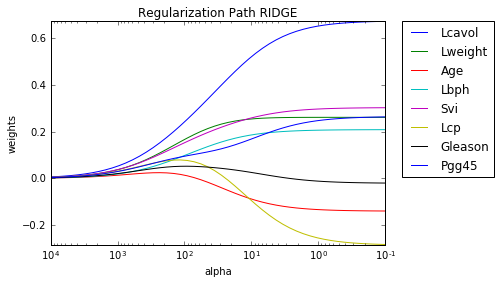

In [16]:
%matplotlib inline
from sklearn.linear_model import Ridge

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(4,-1,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	coefs.append(model.coef_)


ax = plt.gca()
import matplotlib.pylab as plt
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
	plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('pesos')
plt.title('Regularization Path RIDGE')
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


**Regresión Lasso** es un modelo similar a Ridge que aplica regularización a los coeficientes usando la norma $\ell_1$.

El vector de coeficientes de Lasso viene dado por la siguiente formula:

$$ \hat{\beta}^{lasso} = Argmin_\beta\{\sum_{i=1}^{N}(Y_i - \beta_0 - \sum_{j=1}^{p}{(X_{ij}\beta{j})^2} + \alpha \sum_{j=1}^p{|\beta_j|} \} $$

Donde $\alpha \geq 0$ es el parámetro de regularización. Al igual que Ridge, el parámetro $\alpha$ reduce el valor de los coeficientes, pero al usar el valor absoluto es más estricto y provocara que algunos coeficientes se igualen a cero.

En este caso se obtuvo para el dataset de la actividad 1 un modelo haciendo uso de Lasso. Se uso un metodo iterativo para ver el comportamiento de los coeficientes en comparación del $\alpha$ asociado. Notar que para este caso el rango del parámetro de regularización se aplicó entre $\alpha \in [10^1,10^{-3}]$ para visualizar todos los coeficientes con un valor distinto a cero.

Se puede observar que a medida que alpha aumenta todos los coeficientes tienden a cero, pero mucho más rápidamente que al hacer uso de Ridge. Es más, en el punto que Lasso ya ha hecho tender a cero todos los coeficientes, Ridge solo ha disminuido ligeramente su influencia en el modelo. 

Lasso hace tender a cero algunos coeficientes antes que otros y aquellos que hace tender a cero primero tienen cierta correspondencia con aquellos con menor influencia en la respuesta (respecto al z-score como se vió en la actividad 1). Por tanto, se podría decir que Lasso elimina del modelo a aquellas características con menor influencia.

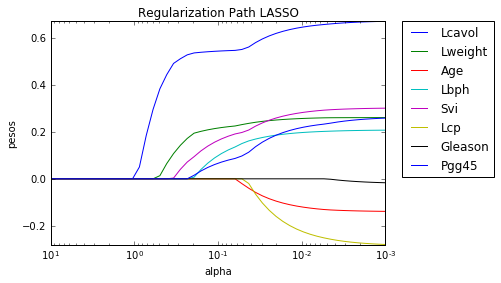

In [30]:
%matplotlib inline
from sklearn.linear_model import Lasso

names_regressors = ["Lcavol", "Lweight", "Age", "Lbph", "Svi", "Lcp", "Gleason", "Pgg45"]
alphas_ = np.logspace(1,-3,base=10)

coefs = []
model = Lasso(fit_intercept=True)
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	coefs.append(model.coef_)


ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
	plt.plot(alphas_, y_arr, label=label)
plt.legend()
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('pesos')
plt.title('Regularization Path LASSO')
plt.axis('tight')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


Se construyó un gráfico para observar el error en los conjuntos entrenamiento y pruebas respecto del parámetro de regularización $\alpha$ usando regularización **Ridge**. El rango del parámetro fue $\alpha \in [10^2,10^{-2}]$.

Se puede observar en el gráfico como el error de entrenamiento disminuye conforme con $\alpha$ y es que se ajusta más a este conjunto a medida que los predictores pueden ejercer más influencia. No obstante, el error en el conjunto de pruebas fue variando y alcanzó su punto mínimo cerca de $\alpha = 10^1$ cuando el error de entrenamiento aún no alcanza su punto mínimo. Notar que entre $10^0$ y $10^-2$ el valor de los errores cambia muy poco.

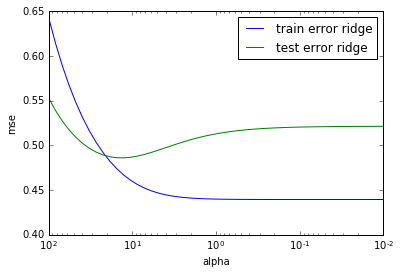

In [26]:
alphas_ = np.logspace(2,-2,base=10)
coefs = []
model = Ridge(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	yhat_train = model.predict(Xtrain)
	yhat_test = model.predict(Xtest)
	mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
	mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge')
ax.plot(alphas_,mse_test,label='test error ridge')
plt.legend(loc=1)
plt.xlabel('alpha')
plt.ylabel('mse')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

A su vez, se construyó un gráfico para observar el error en los conjuntos entrenamiento y pruebas respecto del parámetro de regularización $\alpha$ usando Regresi. El rango del parámetro fue $\alpha \in [10^{0.5},10^{-2}]$.

Se puede observar en el gráfico como el error de entrenamiento disminuye conforme con $\alpha$ y que se ajusta más a este conjunto a medida que más predictores van ejerciendo influencia. 

No obstante, el error en el conjunto de pruebas fue variando y alcanzó su punto mínimo cerca de $\alpha = 10^{-1}$ cuando el error de entrenamiento aún no alcanzaba su punto mínimo y cuando solo han sido removidos del modelo los predictores `age`, `lcp` y `gleason`.

Notar que el error es alto para $\alpha > 10^0$ puesto que en ese punto todos los coeficientes son iguales a cero.

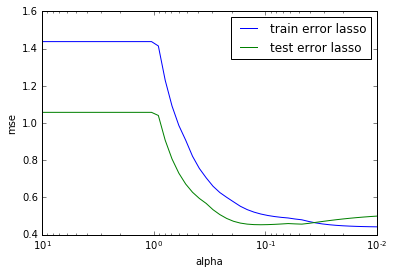

In [28]:
alphas_ = np.logspace(1,-2,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
	model.set_params(alpha=a)
	model.fit(Xtrain, ytrain)
	yhat_train = model.predict(Xtrain)
	yhat_test = model.predict(Xtest)
	mse_train.append(np.mean(np.power(yhat_train - ytrain, 2)))
	mse_test.append(np.mean(np.power(yhat_test - ytest, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error lasso')
ax.plot(alphas_,mse_test,label='test error lasso')
plt.legend(loc=1)
plt.xlabel('alpha')
plt.ylabel('mse')
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Finalmente, sobre ambas regresiones Ridge y Lasso se aplicó un método de validación cruzada k-fold con $k=10$ para buscar el $\alpha$ que redujera el error en el conjunto de entrenamiento y observando el error en el conjunto de pruebas.

Notar que $\alpha \in [10^2,10^{-2}]$ para la búsqueda en la regresión Ridge y $\alpha \in [10^{0.5},10^{-3}]$ para la búsqueda en la regresión de Lasso.

Se puede ver que el mejor $\alpha$ encontrado para Ridge fue el valor $\alpha = 2.33$ con un error promedio sobre el conjunto de entrenamiento de $0.751$ y de $0.504$ sobre el conjunto de pruebas. Este valor no se corresponde con el valor $\alpha=12.649$ que minimiza el error para el conjunto de pruebas con error en éste de $0.486$ y un error sobre el conjunto de entrenamiento de $0.779$. Sin embargo, podría considerarse esta diferencia de error como marginal.

In [34]:
from sklearn import cross_validation
def MSE(y,yhat): return np.mean(np.power(y-yhat,2))
Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
k_fold = cross_validation.KFold(len(Xm),10)

print "\nRidge CV"
best_cv_mse = float("inf")
model = Ridge(fit_intercept=True)
alphas_ = np.logspace(2,-2,base=10)
for a in alphas_:
	print "Testing alpha:%f"%a
	model.set_params(alpha=a)
	mse_list_k10 = [MSE(model.fit(Xm[train], ym[train]).predict(Xm[val]), ym[val]) \
	for train, val in k_fold]
	if np.mean(mse_list_k10) < best_cv_mse:
		#print np.round(mse_list_k10,2)
		best_cv_mse = np.mean(mse_list_k10)
		best_alpha = a
		print "Mejor parametro=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

		model.set_params(alpha=a)
		model.fit(Xm,ym)
		print "Test Error %f"%MSE(model.predict(Xtest),ytest)

print "\nLasso CV"
best_cv_mse = float("inf")
model = Lasso(fit_intercept=True)
alphas_ = np.logspace(0.5,-3,base=10)
for a in alphas_:
	print "Testing alpha:%f"%a
	model.set_params(alpha=a)
	mse_list_k10 = [MSE(model.fit(Xm[train],ym[train]).predict(Xm[val]), ym[val]) \
	for train, val in k_fold]
	if np.mean(mse_list_k10) < best_cv_mse:
		#print np.round(mse_list_k10,2)
		best_cv_mse = np.mean(mse_list_k10)
		best_alpha = a
		print "Mejor parámetro=%f, MSE(CV)=%f"%(best_alpha,best_cv_mse)

		model.set_params(alpha=a)
		model.fit(Xm,ym)
		print "Test Error %f"%MSE(model.predict(Xtest),ytest)



Ridge CV
Testing alpha:100.000000
BEST PARAMETER=100.000000, MSE(CV)=0.999646
Test Error 0.553127
Testing alpha:82.864277
BEST PARAMETER=82.864277, MSE(CV)=0.965780
Test Error 0.539091
Testing alpha:68.664885
BEST PARAMETER=68.664885, MSE(CV)=0.935286
Test Error 0.527173
Testing alpha:56.898660
BEST PARAMETER=56.898660, MSE(CV)=0.908007
Test Error 0.517143
Testing alpha:47.148664
BEST PARAMETER=47.148664, MSE(CV)=0.883727
Test Error 0.508789
Testing alpha:39.069399
BEST PARAMETER=39.069399, MSE(CV)=0.862205
Test Error 0.501932
Testing alpha:32.374575
BEST PARAMETER=32.374575, MSE(CV)=0.843206
Test Error 0.496429
Testing alpha:26.826958
BEST PARAMETER=26.826958, MSE(CV)=0.826516
Test Error 0.492168
Testing alpha:22.229965
BEST PARAMETER=22.229965, MSE(CV)=0.811949
Test Error 0.489062
Testing alpha:18.420700
BEST PARAMETER=18.420700, MSE(CV)=0.799351
Test Error 0.487031
Testing alpha:15.264180
BEST PARAMETER=15.264180, MSE(CV)=0.788588
Test Error 0.485990
Testing alpha:12.648552
BEST PA